In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats. One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs.

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.

Dimensions

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

In [4]:
df = pd.read_csv('diamonds kaggle dataset PATH')

In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.shape

(53940, 11)

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df = df.drop("Unnamed: 0", axis = 1)

In [11]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


##Data Cleaning

In [13]:
len(df[df["x"]== 0]), len(df[df["y"]== 0]), len(df[df["z"]== 0])

(8, 7, 20)

In [14]:
df = df.drop(df[df["x"]== 0].index)
df = df.drop(df[df["y"]== 0].index)
df = df.drop(df[df["z"]== 0].index)

In [15]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [16]:
df.shape

(53920, 10)

##Plots

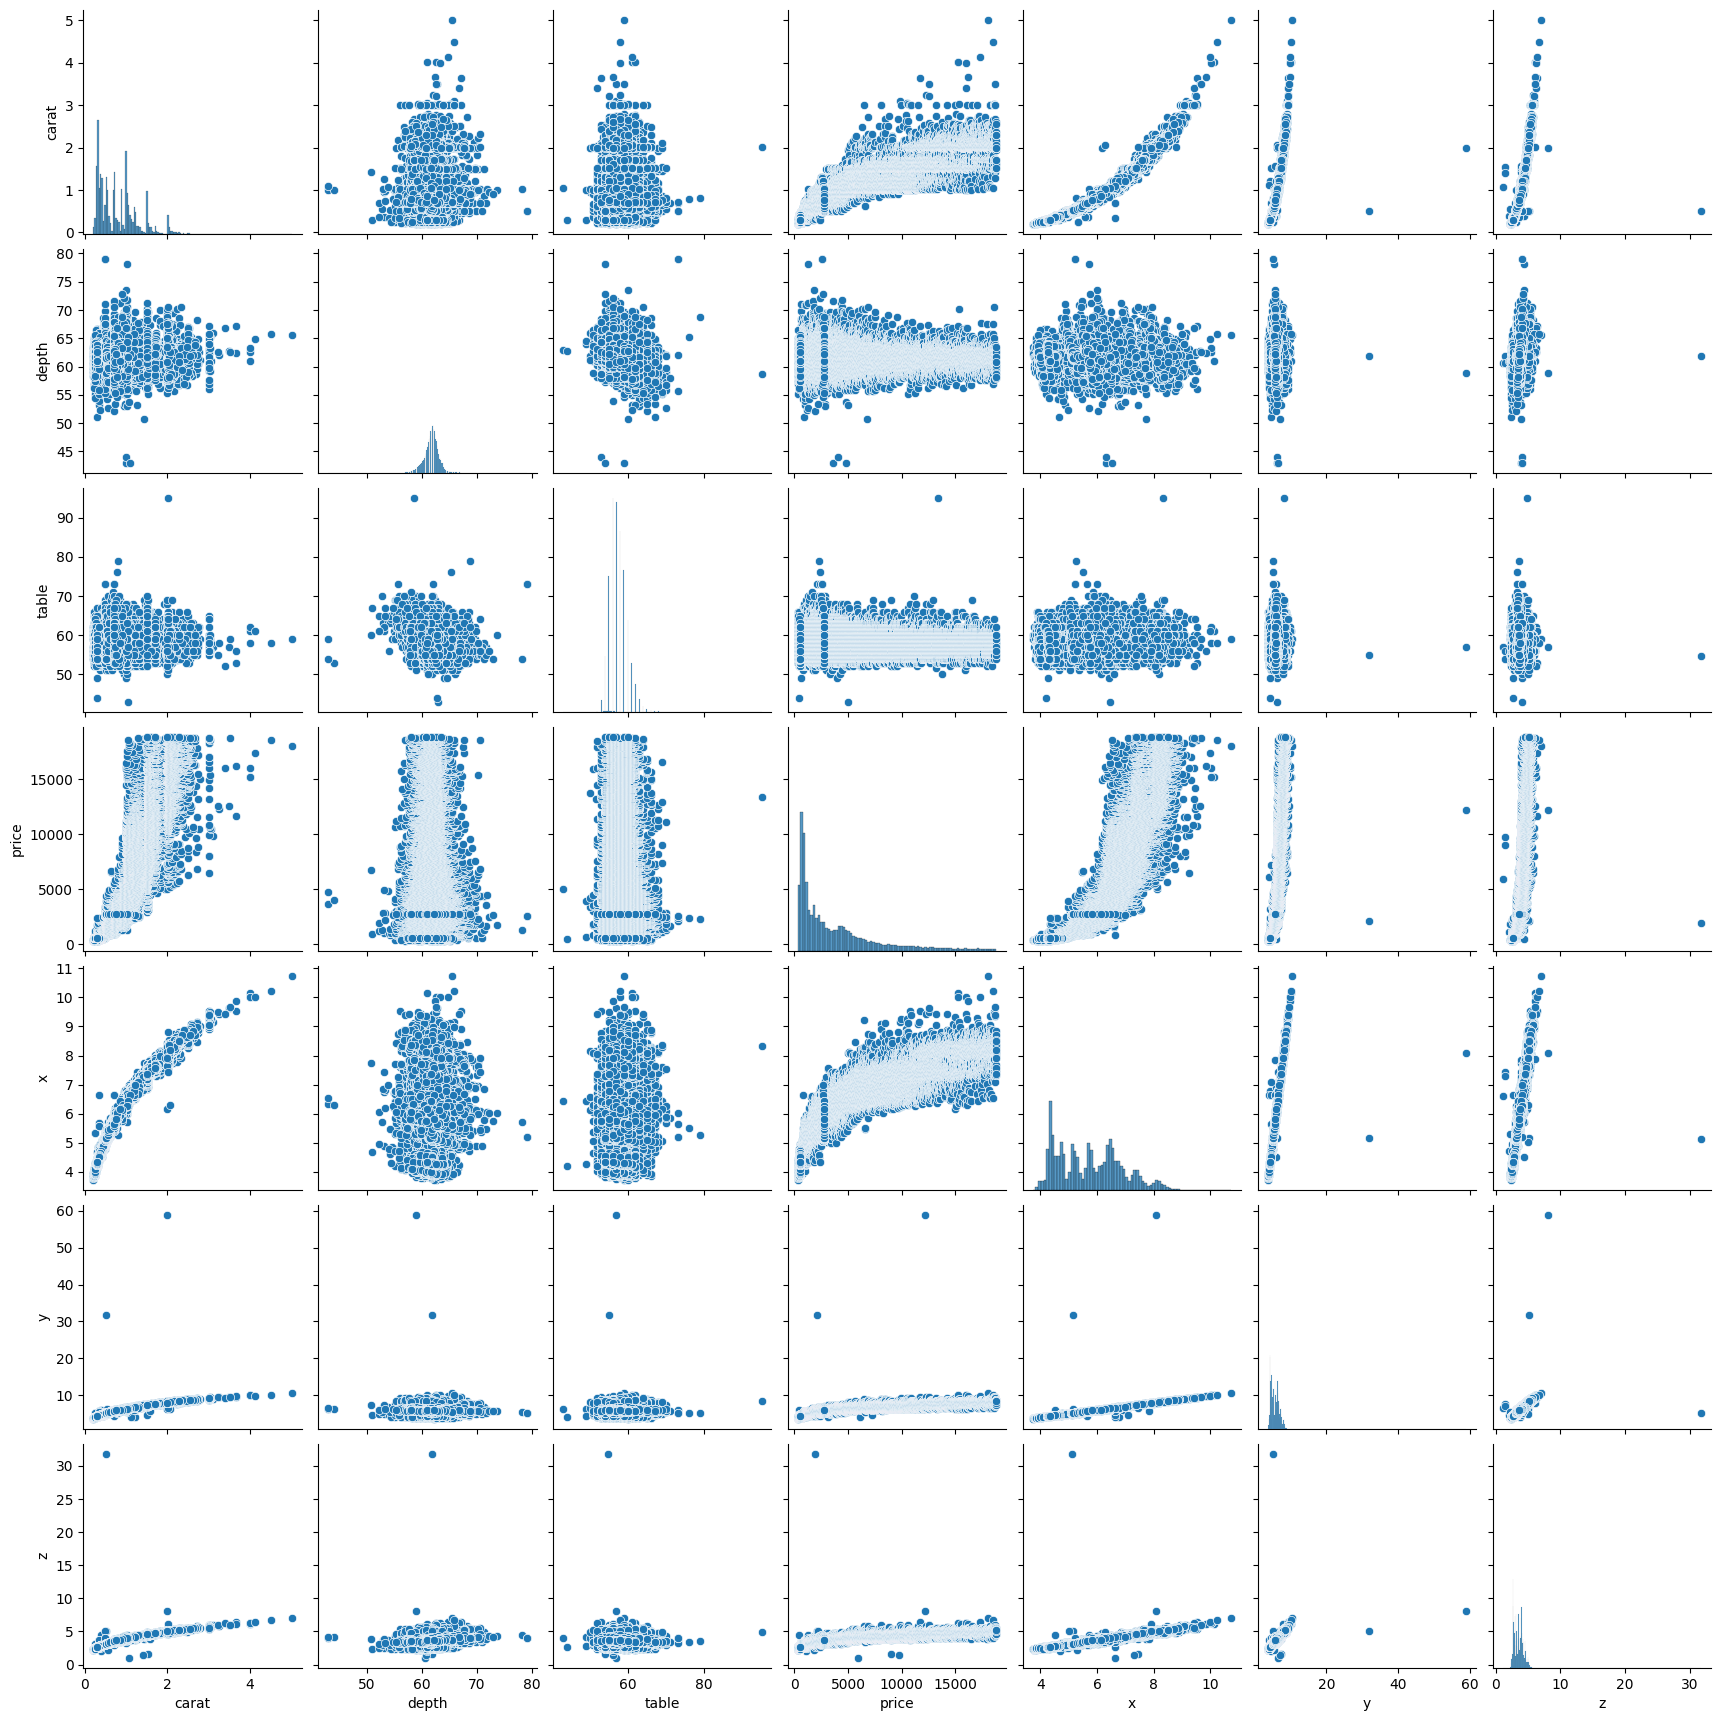

In [17]:
sns.pairplot(df)
plt.show()

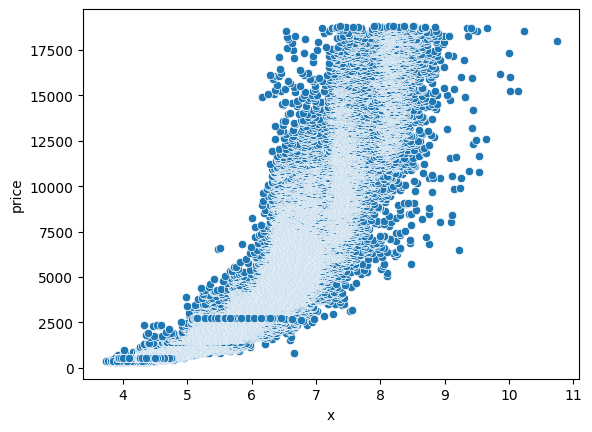

In [18]:
sns.scatterplot(x = df["x"], y = df["price"])
plt.show()

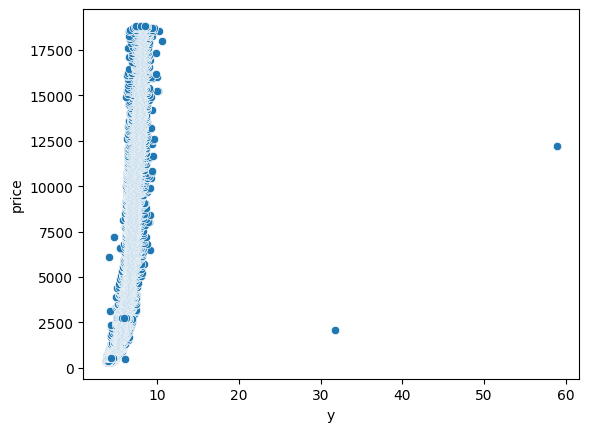

In [19]:
sns.scatterplot(x = df["y"], y = df["price"])
plt.show()

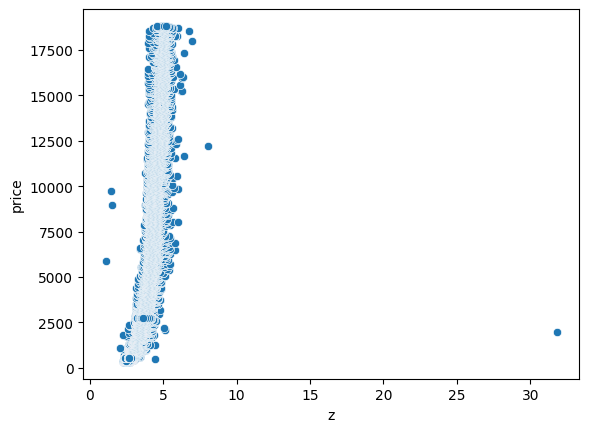

In [20]:
sns.scatterplot(x = df["z"], y = df["price"])
plt.show()

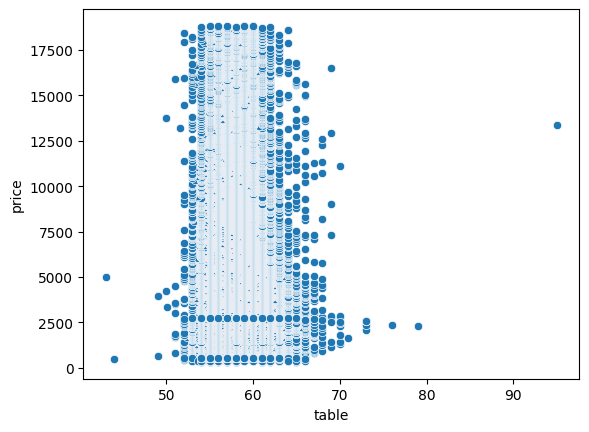

In [21]:
sns.scatterplot(x = df["table"], y = df["price"])
plt.show()

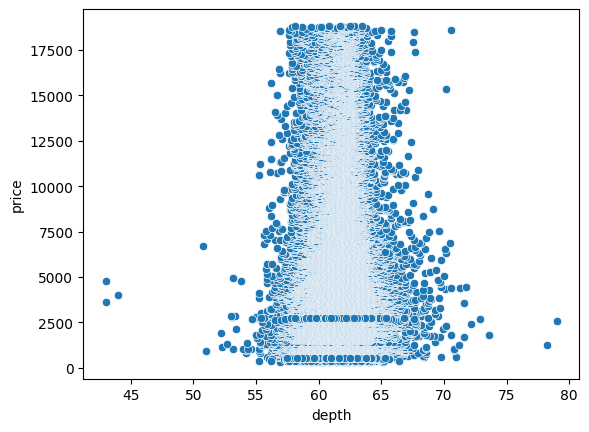

In [22]:
sns.scatterplot(x = df["depth"], y = df["price"])
plt.show()

##Outliers

In [23]:
len(df[(df["depth"] < 75)&(df["depth"] > 45)])

53914

In [24]:
len(df)

53920

In [25]:
len(df[(df["table"] < 80)&(df["table"] > 40)])

53919

In [26]:
len(df[(df["z"] < 30)&(df["z"] > 2)])

53916

In [27]:
len(df[(df["y"] < 20)])

53918

In [28]:
df = df[(df["depth"] < 75)&(df["depth"] > 45)]
df = df[(df["table"] < 80)&(df["table"] > 40)]
df = df[(df["z"] < 30)&(df["z"] > 2)]
df = df[(df["y"] < 20)]

In [29]:
df.describe()

,carat,depth,table,price,x,y,z
count,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000,53907.000000
mean,0.797628,61.749741,57.455948,3930.584470,5.731463,5.733292,3.539441
std,0.473765,1.420119,2.226153,3987.202815,1.119384,1.111252,0.691434
min,0.200000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.040000
max,5.010000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


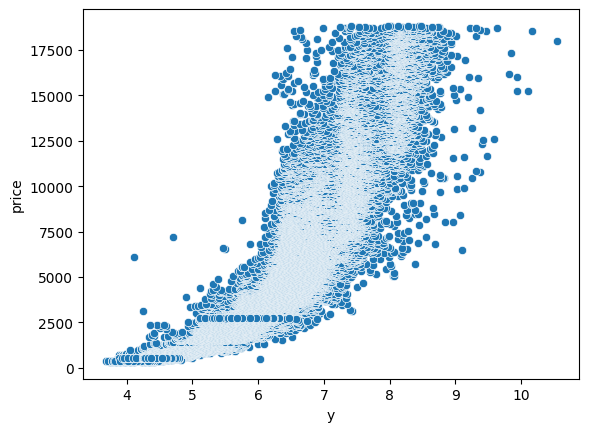

In [30]:
sns.scatterplot(x = df["y"], y = df["price"])
plt.show()

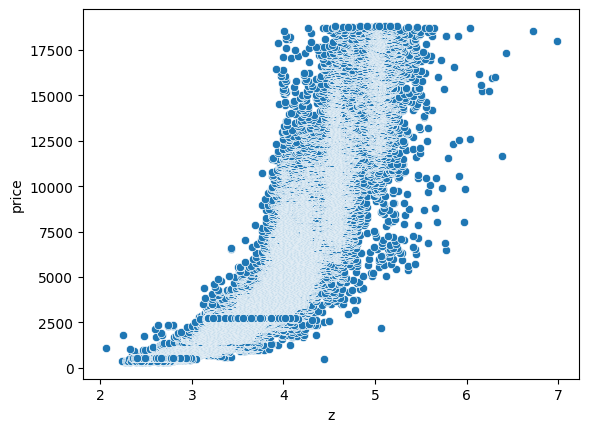

In [31]:
sns.scatterplot(x = df["z"], y = df["price"])
plt.show()

In [32]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


##Encoding and Scaling

In [33]:
df["cut"].value_counts()

,count
cut,
Ideal,21543
Premium,13779
Very Good,12080
Good,4902
Fair,1603


In [34]:
df["color"].value_counts()

,count
color,
G,11282
E,9792
F,9536
H,8296
D,6774
I,5420
J,2807


In [35]:
df["clarity"].value_counts()

,count
clarity,
SI1,13059
VS2,12250
SI2,9184
VS1,8167
VVS2,5066
VVS1,3654
IF,1790
I1,737


In [36]:
X = df.drop("price", axis = 1)
y = df["price"]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [39]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label_encoder = LabelEncoder()

In [41]:
for col in ["cut", "color", "clarity"]:
  X_train[col] = label_encoder.fit_transform(X_train[col])
  X_test[col] = label_encoder.transform(X_test[col]) #Data Leakage

In [42]:
X_train["cut"].value_counts()

,count
cut,
2,16178
3,10368
4,9020
1,3666
0,1198


In [43]:
X_test["cut"].value_counts()

,count
cut,
2,5365
3,3411
4,3060
1,1236
0,405


In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##Model

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

MAE: 864.5945387870814
MSE: 1847631.3774594394
RMSE: 1359.2760490273636
Score 0.8850163452280001


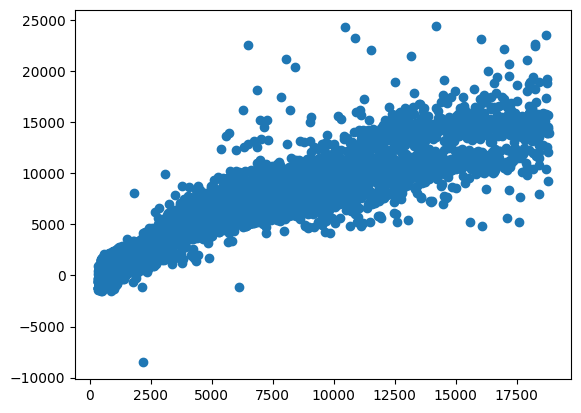

In [47]:
linear = LinearRegression()
linear.fit(X_train_scaled, y_train)
y_pred = linear.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("Score", score)

plt.scatter(y_test, y_pred)
plt.show()

MAE: 1398.2632905135665
MSE: 8155498.032883636
RMSE: 2855.7832608381955
Score 0.49245884122391603


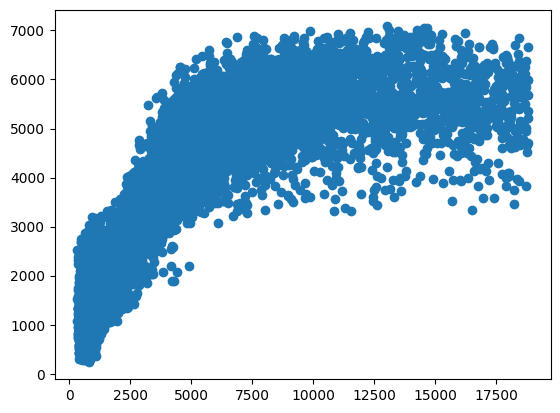

In [48]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred = svr.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("Score", score)

plt.scatter(y_test, y_pred)
plt.show()

##Hyperparameter Tuning

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param_grid = {
    "C": [0.1, 1,10,100,1000],
    "gamma": [1,0.1, 0.001],
    "kernel": ["rbf", "linear"]
}

In [54]:
grid = GridSearchCV(estimator = SVR(), param_grid =param_grid, n_jobs = -1, verbose = 3)

In [55]:
grid.fit(X_train_scaled, y_train) #It might take a while to finish this step, be patient.

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [57]:
grid.best_params_

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

MAE: 482.0696886410416
MSE: 880242.8216183798
RMSE: 938.2125673952464
Score 0.945219843118452


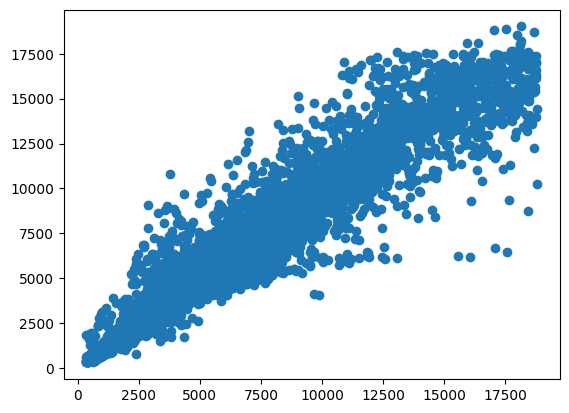

In [58]:
y_pred = grid.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("Score", score)

plt.scatter(y_test, y_pred)
plt.show()